# **Welcome to AI-Health Guard Research Paper**



> AI HEALTH GUARD
* Your Personalized Health Advisor. Predicts diseases, offers
tailored medical advice, workouts, and diet plans for holistic
well-being.

---

# **About Dataset**
### **Context**
---
> The data for "AI HEALTH GUARD" is from [Kaggle](https://www.kaggle.com/datasets/alokchoudhary2005/ai-health-guard/), a platform for data scientists and machine learning engineers. This dataset includes 8 `csv` files

**● Symptom-severity.csv:** Describes the severity of specific symptoms.

**● Original_Dataset.csv:** The main dataset used to train the machine learning model.

**● description.csv**: Gives detailed descriptions of the health conditions.

**● diets.csv:** Provides information about which diets are appropriate for various health conditions.

**● medications.csv**: Gives details of when and how to take what kind of medication, should you need some.

**● precautions_df.csv:** Lists the different precautions that you are advised to adopt when facing various health conditions.

**● symtoms_df.csv:** Contains an exhaustive list of symptoms presented by different illnesses.

**● workout_df.csv:** Lists planned ways that are suited to an individual's specific health demands and encompasses work-outs combined with lifestyle advice for a healthy lifestyle

### **Data Analysis Insight:**
* Insights from data analysis shed light on trends, patterns and correlations
between symptoms and health conditions.

### **Recommendation Generation:**
* The recommendation generation process involves analyzing user-input symptoms
and generating personalized health recommendations.


---

## **Conclusion**
* The AI Health Guard project represents a significant endeavor in utilizing data science and machine learning techniques to empower individuals in managing their health effectively. By leveraging advanced algorithms and personalized recommendations, the system aims to enhance healthcare outcomes and promote overall well-being.

In [1]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import networkx as nx
import plotly.graph_objects as go
import plotly.figure_factory as ff
from wordcloud import WordCloud

import warnings
from sklearn.utils import shuffle
warnings.filterwarnings("ignore")


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve, roc_curve, auc
from sklearn.model_selection import cross_val_score, KFold, RandomizedSearchCV
from sklearn.datasets import make_classification
from collections import Counter
import pickle

In [2]:
# import data
df = pd.read_csv('/content/drive/MyDrive/Data Science My Repository/Projects/AI Health Guard Research /AI Health Guard Datasets/Symptoms-Disease Datasets/Original_Dataset.csv')
df = shuffle(df, random_state=42)
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
373,Acne,skin_rash,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4916,Acne,skin_rash,pus_filled_pimples,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1550,Hyperthyroidism,fatigue,mood_swings,weight_loss,restlessness,sweating,diarrhoea,fast_heart_rate,excessive_hunger,muscle_weakness,irritability,abnormal_menstruation,NaN,NaN,NaN,NaN,NaN,NaN
3081,AIDS,muscle_wasting,patches_in_throat,high_fever,extra_marital_contacts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3857,Chronic cholestasis,itching,vomiting,yellowish_skin,nausea,loss_of_appetite,abdominal_pain,yellowing_of_eyes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.shape

(4920, 18)

* Current shape of dataset is `4920` rows and `18` columns.

In [ ]:
# charactieristics of data
df.describe()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
count,4920,4920,4920,4920,4572,3714,2934,2268,1944,1692,1512,1194,744,504,306,240,192,72
unique,41,34,48,54,50,38,32,26,21,22,21,18,11,8,4,3,3,1
top,Acne,vomiting,vomiting,fatigue,high_fever,headache,nausea,abdominal_pain,abdominal_pain,yellowing_of_eyes,yellowing_of_eyes,irritability,malaise,stomach_bleeding,chest_pain,chest_pain,loss_of_smell,muscle_pain
freq,120,822,870,726,378,348,390,264,276,228,198,120,126,72,96,144,72,72


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4920 entries, 373 to 860
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Disease     4920 non-null   object
 1   Symptom_1   4920 non-null   object
 2   Symptom_2   4920 non-null   object
 3   Symptom_3   4920 non-null   object
 4   Symptom_4   4572 non-null   object
 5   Symptom_5   3714 non-null   object
 6   Symptom_6   2934 non-null   object
 7   Symptom_7   2268 non-null   object
 8   Symptom_8   1944 non-null   object
 9   Symptom_9   1692 non-null   object
 10  Symptom_10  1512 non-null   object
 11  Symptom_11  1194 non-null   object
 12  Symptom_12  744 non-null    object
 13  Symptom_13  504 non-null    object
 14  Symptom_14  306 non-null    object
 15  Symptom_15  240 non-null    object
 16  Symptom_16  192 non-null    object
 17  Symptom_17  72 non-null     object
dtypes: object(18)
memory usage: 730.3+ KB


In [ ]:
# check null values
null_checker = df.apply(lambda x: sum(x.isnull())).to_frame(name='count')
print(null_checker)

            count
Disease         0
Symptom_1       0
Symptom_2       0
Symptom_3       0
Symptom_4     348
Symptom_5    1206
Symptom_6    1986
Symptom_7    2652
Symptom_8    2976
Symptom_9    3228
Symptom_10   3408
Symptom_11   3726
Symptom_12   4176
Symptom_13   4416
Symptom_14   4614
Symptom_15   4680
Symptom_16   4728
Symptom_17   4848


In [ ]:
# Assuming 'null_checker' is your DataFrame with the null values count
fig = px.line(null_checker, x=null_checker.index, y='count', title='Ratio of Null Values')
fig.update_layout(xaxis_title='Column Names', yaxis_title='Count of Null Values')
fig.update_xaxes(tickangle=45)
fig.add_annotation(xref="paper", yref="paper", showarrow=False, x=0.5, y=-0.2)
fig.show()

* **Ratio of Null value** graph represent after `Symptom_3` it has lots of null values.

In [ ]:
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
373,Acne,skin_rash,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4916,Acne,skin_rash,pus_filled_pimples,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1550,Hyperthyroidism,fatigue,mood_swings,weight_loss,restlessness,sweating,diarrhoea,fast_heart_rate,excessive_hunger,muscle_weakness,irritability,abnormal_menstruation,NaN,NaN,NaN,NaN,NaN,NaN
3081,AIDS,muscle_wasting,patches_in_throat,high_fever,extra_marital_contacts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3857,Chronic cholestasis,itching,vomiting,yellowish_skin,nausea,loss_of_appetite,abdominal_pain,yellowing_of_eyes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Count the number of occurrences of each disease
disease_counts = df['Disease'].value_counts()
disease_counts

Disease
Acne                                       120
Pneumonia                                  120
Gastroenteritis                            120
Varicose veins                             120
Jaundice                                   120
Drug Reaction                              120
(vertigo) Paroymsal  Positional Vertigo    120
Heart attack                               120
Tuberculosis                               120
Typhoid                                    120
Common Cold                                120
Peptic ulcer diseae                        120
Paralysis (brain hemorrhage)               120
Fungal infection                           120
Impetigo                                   120
GERD                                       120
Dengue                                     120
Malaria                                    120
Chicken pox                                120
Hypothyroidism                             120
Hepatitis C                                120
Hyper

In [ ]:
# Disease Frequency Distribution
# Plotting the frequency of each disease
fig = px.bar(disease_counts, x=disease_counts.index, y=disease_counts.values, title='Frequency of Each Disease', color=disease_counts.index)
fig.update_layout(xaxis_title='Disease', yaxis_title='Count', xaxis={'categoryorder':'total descending'})
fig.show()

* **Frequency of Each Disease** plots represent approx all disease has same count frequency.

In [ ]:
# Heatmap of Symptoms by Disease
# Prepare data for heatmap
symptom_columns = df.columns[1:]
disease_symptom_matrix = df.melt(id_vars=['Disease'], value_vars=symptom_columns, var_name='Symptom', value_name='Presence')
disease_symptom_matrix['Presence'] = disease_symptom_matrix['Presence'].notnull().astype(int)

# Create a pivot table
pivot_table = disease_symptom_matrix.pivot_table(index='Disease', columns='Symptom', values='Presence', aggfunc=np.sum, fill_value=0)

trace = go.Heatmap(z=pivot_table.values, x=pivot_table.columns.tolist(), y=pivot_table.index.tolist(), colorscale='RdBu', colorbar=dict(title='Presence of Symptom'))

layout = go.Layout(title='Heatmap of Symptoms by Disease', xaxis=dict(title='Symptom', ticks='', side='top'), yaxis=dict(title='Disease', ticks='', ticksuffix=' '),
    margin=dict(l=70, b=50, t=90, r=50), hovermode='closest',
    plot_bgcolor='rgba(240,240,240,1)', # Neutral grey background
    paper_bgcolor='rgba(240,240,240,1)' )

fig = go.Figure(data=[trace], layout=layout)
fig.show()

* **Heatmap of Symptoms by Disease** representation :-

    * `Red color area` represent it has `zero` Symptoms.
    * `White color area` represent it has `55 to 70` counts of disease.
    * `Blue color area` represent it has `90 to 120` counts of disease.

In [ ]:
# Pairplot for Symptoms
# Select a subset of data to visualize relationships between symptoms
subset_symptoms = ['Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4', 'Symptom_5']  # Select relevant symptoms for pairplot
subset_df = df[['Disease'] + subset_symptoms].dropna()

# Convert symptoms to binary presence/absence for the pairplot
for symptom in subset_symptoms:
    subset_df[symptom] = subset_df[symptom].notnull().astype(int)

fig = px.scatter_matrix(subset_df, dimensions=subset_symptoms, color='Disease', title='Representation of the Presence or Absence of Symptoms in Relation to different diseases.',
                        labels={col: col.replace('_', ' ') for col in subset_symptoms})  # Replace underscores with spaces for better readability

fig.update_traces(diagonal_visible=False)
fig.show()

* The plot is showing relationships between five symptoms across different diseases. Here are some key points:
    * **Axes:** Each axis represents one of the five selected symptoms (Symptom 1 to Symptom 5).

    * **Points:** Each point in the scatter matrix represents a data entry (e.g., a patient).

    * **Colors:** Points are colored according to the Disease column, which indicates different diseases. The legend on the right lists the diseases with their corresponding colors.
    
    * **Absence/Presence:** Since symptoms are binary (0 or 1), the plots show whether symptoms are present (1) or absent (0) for the pairs of symptoms.

In [ ]:
# Combine all symptoms into one series
all_symptoms = df[symptom_columns].values.flatten()
all_symptoms = [symptom for symptom in all_symptoms if pd.notna(symptom)]

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_symptoms))
# Convert word cloud to array
wordcloud_array = wordcloud.to_array()

fig = go.Figure()
# Add trace for word cloud image
fig.add_trace(go.Image(z=wordcloud_array))
# Set axes properties
fig.update_xaxes(showgrid=False, showticklabels=False, zeroline=False)
fig.update_yaxes(showgrid=False, showticklabels=False, zeroline=False)
# Add layout properties
fig.update_layout(title_text='Word Cloud of Symptoms', title_x=0.5, width=800, height=400, margin={'l': 0, 'r': 0, 't': 30, 'b': 0}, clickmode='event+select' )

fig.show()

Output hidden; open in https://colab.research.google.com to view.

* A word shown in `big size` indicates that it is used more times.

In [ ]:
# Frequency Plot of Top Symptoms
# Flatten the symptom columns into a single list
symptom_list = df[symptom_columns].values.flatten()
symptom_list = [symptom for symptom in symptom_list if pd.notna(symptom)]

# Count the frequency of each symptom
symptom_counts = pd.Series(symptom_list).value_counts().head(20)

fig = px.bar(symptom_counts, x=symptom_counts.values, y=symptom_counts.index, orientation='h',
             title='Most Prevalent Symptoms in the Dataset', color=symptom_counts.index)
fig.update_layout(xaxis_title='Count', yaxis_title='Symptom')
fig.show()

* Top Reported Symptoms in the Study  is `fatigue,` followed by `vomiting`, `high_fever`, `loss_of_appetite`, and `nausea`, etc...

In [ ]:
#  Symptom Co-occurrence Heatmap
# Create a dataframe for symptoms
symptom_columns = df.columns[1:]
symptom_df = df[symptom_columns].notna().astype(int)

# Calculate co-occurrence matrix
co_occurrence_matrix = symptom_df.T.dot(symptom_df)

fig = px.imshow(co_occurrence_matrix, labels=dict(x="Symptoms", y="Symptoms", color="Co-occurrence"), x=symptom_columns, y=symptom_columns, text_auto=True)

fig.update_xaxes(side="top")
fig.update_layout(title='Symptom Correlation Matrix', title_x=0.5, coloraxis_colorbar=dict(title='Co-occurrence'),
    autosize=False, width=1300, height=700, margin=dict(l=10, r=10, b=10, t=30))

fig.show()

* The Heatmap Each row and column of the table represents a different symptom, and the value at the intersection of two rows and columns represents the number of times that the two symptoms co-occurred.

In [ ]:
# Symptom Distribution per Disease
disease = 'Migraine'  # Replace with any disease of interest
symptom_counts = df[df['Disease'] == disease].iloc[:, 1:].notna().sum()

fig = px.bar(symptom_counts.sort_values(), orientation='h', color=symptom_counts.index,
             labels={'index': 'Symptoms', 'value': 'Count'}, title=f'Symptom Distribution for {disease}')
fig.update_layout(xaxis_title='Count', yaxis_title='Symptoms')
fig.show()

* The bar chart shows the distribution of Commons cold symptoms. The x-axis shows the count of people experiencing the symptom, and the y-axis shows the different symptoms. For example, the bar labeled `Symptom_1` is the most common symptom, and around 120 people experienced it.

In [ ]:
# Disease-Symptom Network Graph with Interactive Plot
B = nx.Graph()
# Add nodes with the node attribute "bipartite"
diseases = df['Disease'].unique()
symptoms = pd.melt(df, id_vars=['Disease'], value_vars=df.columns[1:]).dropna()['value'].unique()

B.add_nodes_from(diseases, bipartite=0)
B.add_nodes_from(symptoms, bipartite=1)
# Add edges between diseases and symptoms
edges = []
for index, row in df.iterrows():
    for symptom in df.columns[1:]:
        if pd.notna(row[symptom]):
            edges.append((row['Disease'], row[symptom]))

B.add_edges_from(edges)
# Get positions for the nodes in G
pos = nx.spring_layout(B)
# Extract the edge and node information
edge_x = []
edge_y = []
for edge in B.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)
edge_trace = go.Scatter(x=edge_x, y=edge_y, line=dict(width=0.5, color='#888'), hoverinfo='none', mode='lines')

node_x = []
node_y = []
node_text = []
for node in B.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)
    node_text.append(node)

node_trace = go.Scatter(x=node_x, y=node_y, mode='markers+text', text=node_text, textposition='top center', hoverinfo='text', marker=dict(color=[], size=10, line=dict(width=2)))
node_trace.marker.color = ['blue' if node in diseases else 'red' for node in B.nodes()]

fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(title='<br>Disease-Symptom Network Graph', titlefont_size=16, showlegend=False, hovermode='closest', margin=dict(b=20,l=5,r=5,t=40),
                    annotations=[ dict(text="Alok Choudhary", showarrow=False, xref="paper", yref="paper")],
                    xaxis=dict(showgrid=False, zeroline=False), yaxis=dict(showgrid=False, zeroline=False)))
fig.show()

* The network graph shows connections between different diseases and symptoms.

In [ ]:
# Pie Chart of Top Symptoms
# Count the frequency of each symptom
symptom_counts = df.iloc[:, 1:].stack().value_counts()

# Plot the top 10 symptoms
top_symptoms = symptom_counts.head(10)

fig = px.pie(top_symptoms, values=top_symptoms.values, names=top_symptoms.index, title='Prevalence of Common Cold Symptoms')
fig.update_traces(textinfo='percent+label', pull=[0.1]*10)
fig.show()

* It shows the percentage of people experiencing various symptoms. `Fatigue` is the most common symptom, affecting `15.8%` of people. Other symptoms include `high fever`, `loss of appetite`, `nausea`, `headache`, `abdominal pain`, `yellowish skin`, and `vomiting`.

In [ ]:
# Pie Chart of Disease Distribution
# Count the frequency of each disease
disease_counts = df['Disease'].value_counts().reset_index()
disease_counts.columns = ['Disease', 'Count']

# Create an interactive pie chart with improved readability
fig = px.pie(disease_counts, values='Count', names='Disease', title='Disease Distribution Chart', hover_data=['Disease'], labels={'Disease':'Disease Name'})
fig.update_traces(textposition='inside', textinfo='percent+label', textfont_size=20, marker=dict(line=dict(color='#000000', width=2)))
fig.update_layout(showlegend=True, legend_title_text='Disease')
fig.show()

* It  shows the distribution of different diseases.  Slices of the pie chart represent different diseases, and the size of the slice corresponds to the number of people who have that disease.

## Finding unique values across all the symptoms column

In [ ]:
columns_to_check = []
for col in df.columns:
    if col != 'Disease':
        columns_to_check.append(col)

In [ ]:
symptoms = df.iloc[:, 1:].values.flatten()
symptoms = list(set(symptoms))

## Convert Symptoms to Binary Columns

In [ ]:
for symptom in symptoms:
    df[symptom] = df.iloc[:, 1:].apply(lambda row: int(symptom in row.values), axis=1)

df_v1 = df.drop(columns=columns_to_check)

In [ ]:
df_v1 = df_v1.loc[:, df_v1.columns.notna()]

In [ ]:
df_v1.shape

(4920, 132)

* Now shape of dataset is `4920` rows and `132` columns.

In [ ]:
df_v1.columns = df_v1.columns.str.strip()

In [ ]:
df_v1.columns

Index(['Disease', 'swelling_of_stomach', 'chest_pain', 'distention_of_abdomen',
       'altered_sensorium', 'fatigue', 'loss_of_appetite', 'blood_in_sputum',
       'drying_and_tingling_lips', 'pain_during_bowel_movements',
       ...
       'runny_nose', 'ulcers_on_tongue', 'headache', 'skin_peeling',
       'dark_urine', 'high_fever', 'continuous_sneezing', 'bruising',
       'family_history', 'fast_heart_rate'],
      dtype='object', length=132)

In [ ]:
df_v1.head(5)

,Disease,swelling_of_stomach,chest_pain,distention_of_abdomen,altered_sensorium,fatigue,loss_of_appetite,blood_in_sputum,drying_and_tingling_lips,pain_during_bowel_movements,...,runny_nose,ulcers_on_tongue,headache,skin_peeling,dark_urine,high_fever,continuous_sneezing,bruising,family_history,fast_heart_rate
373,Acne,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4916,Acne,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1550,Hyperthyroidism,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3081,AIDS,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3857,Chronic cholestasis,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Heatmap: Correlation Between Symptoms
# Select symptom columns
symptom_columns = df_v1.columns[1:]
# Calculate the correlation matrix
correlation_matrix = df_v1[symptom_columns].corr()
# Create a heatmap with Plotly
fig = go.Figure(data=go.Heatmap(z=correlation_matrix.values, x=correlation_matrix.columns, y=correlation_matrix.index, colorscale='Viridis',
                colorbar=dict(title="Correlation"), zmin=-1, zmax=1))
# Optimize annotations: only show for high absolute correlation values
threshold = 0.5
annotations = []
for i in range(len(correlation_matrix)):
    for j in range(len(correlation_matrix)):
        value = correlation_matrix.iloc[i, j]
        if abs(value) >= threshold:
            annotations.append(dict(x=correlation_matrix.columns[j], y=correlation_matrix.index[i], text=str(round(value, 2)), showarrow=False,
                    font=dict(color='white' if abs(value) > 0.5 else 'black')))

fig.update_layout(title='Correlation Between Symptoms', xaxis_title='Symptoms', yaxis_title='Symptoms', annotations=annotations, xaxis=dict(tickangle=45))
fig.show()

* The heatmap shows the correlation between different pairs of symptoms. Each row and column of the heatmap represents a symptom. The color intensity in each cell indicates the strength of the correlation between the two symptoms represented by that row and column. Darker colors represent stronger correlations, either positive or negative.

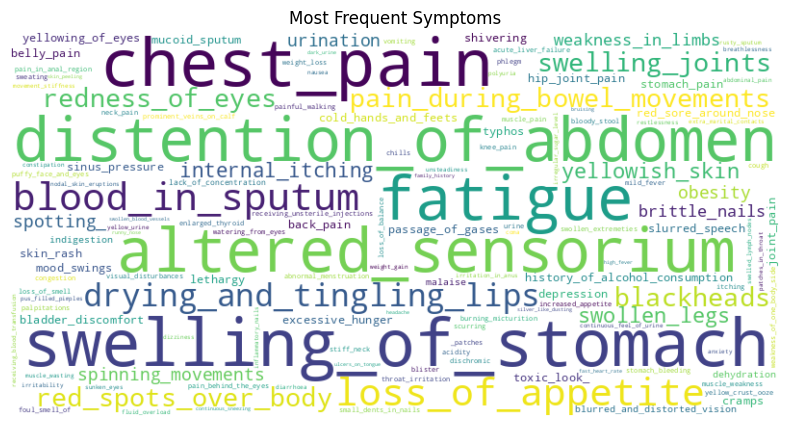

In [ ]:
# Word Cloud: Most Frequent Symptoms
# Combine all symptoms into a single string
symptoms = ' '.join(df_v1.columns[1:])
# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(symptoms)
# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Symptoms')
plt.show()

*  A word shown in `big size` indicates that it is used more times.

In [ ]:
# Scatter Plot Matrix: Relationships Between Symptoms
# Select a subset of symptoms for better visualization
selected_symptoms = df_v1.columns[1:10]
fig = px.scatter_matrix(df_v1, dimensions=selected_symptoms, color='Disease', title='Exploring Symptom Relationships')
fig.show()

* It show the relationships between different symptoms. Each small square graph shows the correlation between two specific symptoms.

In [ ]:
# To visualize the relationships between different symptoms and diseases.
# Create a parallel categories diagram
fig = px.parallel_categories(df_v1, dimensions=['Disease', 'family_history', 'muscle_weakness', 'silver_like_dusting'],
                             title="Multidimensional Relationships Between Diseases and Symptoms", color_continuous_scale='viridis')
fig.show()

* It show relationships between multiple categorical variables. In this example, the categories are different diseases and symptoms. Each vertical axis represents a single variable, and each data point is a combination of categories across all variables. Lines connect the data points, showing how different categories co-occur.

In [ ]:
# To show the hierarchical structure of symptoms and diseases.
# Create a sunburst chart
fig = px.sunburst(df_v1, path=['Disease', 'family_history', 'muscle_weakness'], title='Hierarchical Structure of Symptoms and Diseases')
fig.show()

* The chart shows a hierarchical structure of symptoms and diseases. The center circle represents all diseases, and the outer rings represent increasingly specific categories of symptoms.

In [ ]:
# To explore the distribution of diseases in a 3D space based on selected symptoms.
# Create a 3D scatter plot
fig = px.scatter_3d(df_v1, x='family_history', y='muscle_weakness', z='silver_like_dusting', color='Disease', title='Exploring Multidimensional Symptom Relationships')
fig.show()

* The plot show the distribution of data points across three dimensions, which represent selected symptoms. Each data point represents a patient, and the position of the point along each axis corresponds to the severity or presence of a particular symptom.  For example, one axis might represent `muscle weakness`, another  `family history`, and the third `silver-like dusting`.  By examining the position of the data points in 3D space, you can see how the different symptoms co-occur in the patient population.

In [ ]:
# To show the flow from symptoms to diseases.
# Define the nodes and links for the Sankey diagram
nodes = list(df_v1['Disease'].unique()) + list(df_v1.columns[1:10])
links = []

for disease in df_v1['Disease'].unique():
    for symptom in df_v1.columns[1:10]:
        count = df_v1[(df_v1['Disease'] == disease) & (df_v1[symptom] == 1)].shape[0]
        if count > 0:
            links.append({'source': nodes.index(symptom), 'target': nodes.index(disease), 'value': count})
# Create the Sankey diagram
fig = go.Figure(go.Sankey(node=dict( pad=15, thickness=20, line=dict(color="black", width=0.5), label=nodes),
    link=dict( source=[link['source'] for link in links], target=[link['target'] for link in links], value=[link['value'] for link in links])))
fig.update_layout(title_text="Flows Between Diseases and Symptoms", font_size=10)
fig.show()

* The diagram show the flow of patients between different diseases and related symptoms. The width of the arrows represents the number of patients experiencing a particular symptom or disease.

In [ ]:
# To visualize the occurrence of diseases with varying symptom counts.
# Create a bubble chart
df_v1['symptom_count'] = df_v1.iloc[:, 1:].sum(axis=1)
fig = px.scatter(df_v1, x='Disease', y='symptom_count', size='symptom_count', color='Disease', title='Bubble Chart of Disease Symptom Counts')
fig.show()

* The chart shows the number of symptoms associated with various diseases. The size of the bubble corresponds to the number of symptoms.

In [ ]:
# Create the graph
G = nx.Graph()
# Add nodes and edges
diseases = df_v1['Disease'].unique()
symptoms = df_v1.columns[1:]
# Add disease nodes
for disease in diseases:
    G.add_node(disease, type='disease')
# Add symptom nodes and edges
for symptom in symptoms:
    G.add_node(symptom, type='symptom')
    for disease in diseases:
        if df_v1[df_v1['Disease'] == disease][symptom].sum() > 0:
            G.add_edge(disease, symptom)
# Define node positions using a spring layout
pos = nx.spring_layout(G)
# Create edge traces
edge_trace = go.Scatter( x=[], y=[], line=dict(width=0.5, color='#888'), hoverinfo='none', mode='lines')

for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_trace['x'] += (x0, x1, None)
    edge_trace['y'] += (y0, y1, None)

# Create node traces
node_trace = go.Scatter( x=[], y=[], text=[], mode='markers+text', textposition='top center', hoverinfo='text',
    marker=dict( showscale=True, colorscale='YlGnBu', size=10, colorbar=dict( thickness=15, title='Node Connections', xanchor='left', titleside='right'), color=[]))

for node in G.nodes():
    x, y = pos[node]
    node_trace['x'] += (x,)
    node_trace['y'] += (y,)
    node_trace['text'] += (node,)
    node_trace['marker']['color'] += (G.degree(node),)

# Create the plot
fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(title='Disease-Symptom Network', titlefont_size=16, showlegend=False, hovermode='closest', margin=dict(b=20, l=5, r=5, t=40),
                    annotations=[dict(text="Network graph of diseases and symptoms (by Alok Choudhary)", showarrow=False, xref="paper", yref="paper", x=0.005, y=-0.002)],
                    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False), yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)))
fig.show()

* Nodes in the graph represent various diseases and symptoms. Edges connect nodes that are frequently co-occur together. Thicker edges indicate stronger connections.

In [ ]:
# Create a hexbin plot
fig = px.density_heatmap(df_v1, x='family_history', y='muscle_weakness', nbinsx=20, nbinsy=20, title='Distribution of Family History and Muscle Weakness')
fig.show()

* It shows the distribution of co-occurrences between two variables: `family_history` and `muscle_weakness`. Each hexagon represents a count of patients. The position of the hexagon on the x-axis indicates the value for `family_history`, and the position on the y-axis indicates the value for `muscle_weakness`. The size of the hexagon represents the number of patients who have that combination of `family_history` and `muscle_weakness` values.

In [ ]:
df_v1.head(5)

,Disease,swelling_of_stomach,chest_pain,distention_of_abdomen,altered_sensorium,fatigue,loss_of_appetite,blood_in_sputum,drying_and_tingling_lips,pain_during_bowel_movements,...,ulcers_on_tongue,headache,skin_peeling,dark_urine,high_fever,continuous_sneezing,bruising,family_history,fast_heart_rate,symptom_count
373,Acne,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
4916,Acne,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
1550,Hyperthyroidism,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,11
3081,AIDS,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,4
3857,Chronic cholestasis,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,7


# **Model Training**

  * Splitting the data into features (X) and target variable (Y)

In [ ]:
X = df_v1.drop('Disease', axis=1)
y = df_v1['Disease']

# ecoding Disease
le = LabelEncoder()
le.fit(y)
Y = le.transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
print("Shape of X_train : ", X_train.shape)
print("Shape of X_test : ", X_test.shape)
print("Shape of y_train : ", y_train.shape)
print("Shape of y_test : ", y_test.shape)

Shape of X_train :  (3936, 132)
Shape of X_test :  (984, 132)
Shape of y_train :  (3936,)
Shape of y_test :  (984,)


In [ ]:
X_train[:2]

,swelling_of_stomach,chest_pain,distention_of_abdomen,altered_sensorium,fatigue,loss_of_appetite,blood_in_sputum,drying_and_tingling_lips,pain_during_bowel_movements,blackheads,...,ulcers_on_tongue,headache,skin_peeling,dark_urine,high_fever,continuous_sneezing,bruising,family_history,fast_heart_rate,symptom_count
381,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3824,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,9


In [ ]:
# Create a dictionary to store models
models = {
    'SVC': SVC(kernel='linear'),
    'Logistic_Regression': LogisticRegression(),
    'NaiveBayes': GaussianNB(),
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    'GradientBoosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'KNeighbors': KNeighborsClassifier(n_neighbors=5),
    'MultinomialNB': MultinomialNB()
}

In [ ]:
# Dictionary to store accuracies and confusion matrices
accuracies = {}
confusion_matrices = {}

# Loop through the models, train, test, and store results
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Test the model
    predictions = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, predictions)
    accuracies[model_name] = accuracy

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, predictions)
    confusion_matrices[model_name] = cm

In [ ]:
# Print accuracies
for model_name, accuracy in accuracies.items():
    print(f"{model_name} Accuracy: {accuracy}")

SVC Accuracy: 1.0
Logistic_Regression Accuracy: 1.0
NaiveBayes Accuracy: 1.0
RandomForest Accuracy: 1.0
GradientBoosting Accuracy: 1.0
KNeighbors Accuracy: 1.0
MultinomialNB Accuracy: 1.0


> An accuracy of `1.0 (or 100%)` suggests that the model is predicting perfectly on the test set. While achieving perfect accuracy can be a good sign, especially in simpler datasets, it's also worth considering the possibility of overfitting.

> Calculate precision, recall, and F1-score for each class. These metrics are useful for understanding the performance of a classification model, especially when dealing with imbalanced classes.

In [ ]:
def get_metrics(y_true, predictions):
    metrics = {}
    MSE = mean_squared_error(y_true, predictions)
    RMSE = np.sqrt(MSE)
    MAE = mean_absolute_error(y_true, predictions)
    R2 = r2_score(y_true, predictions)

    metrics['MSE'] = MSE
    metrics['RMSE'] = RMSE
    metrics['MAE'] = MAE
    metrics['R2'] = R2

    return metrics
# Create an empty DataFrame to store metrics
metrics_df = pd.DataFrame(columns=['Model', 'MSE', 'RMSE', 'MAE', 'R2'])
# Iterate through each model in the dictionary
for model_name, model in models.items():
    metrics = get_metrics(y_test, predictions)
    metrics['Model'] = model_name
    metrics_df = pd.concat([metrics_df, pd.DataFrame(metrics, index=[0])], ignore_index=True)

# Print the DataFrame
print(metrics_df)

                 Model  MSE  RMSE  MAE   R2
0                  SVC  0.0   0.0  0.0  1.0
1  Logistic_Regression  0.0   0.0  0.0  1.0
2           NaiveBayes  0.0   0.0  0.0  1.0
3         RandomForest  0.0   0.0  0.0  1.0
4     GradientBoosting  0.0   0.0  0.0  1.0
5           KNeighbors  0.0   0.0  0.0  1.0
6        MultinomialNB  0.0   0.0  0.0  1.0


In [ ]:
# Print confusion matrices
for model_name, cm in confusion_matrices.items():
    print(f"{model_name} Confusion Matrix:")
    print(np.array2string(cm, separator=', '))
    print("\n" + "="*40 + "\n")

SVC Confusion Matrix:
[[18,  0,  0, ...,  0,  0,  0],
 [ 0, 20,  0, ...,  0,  0,  0],
 [ 0,  0, 32, ...,  0,  0,  0],
 ...,
 [ 0,  0,  0, ..., 24,  0,  0],
 [ 0,  0,  0, ...,  0, 26,  0],
 [ 0,  0,  0, ...,  0,  0, 21]]


Logistic_Regression Confusion Matrix:
[[18,  0,  0, ...,  0,  0,  0],
 [ 0, 20,  0, ...,  0,  0,  0],
 [ 0,  0, 32, ...,  0,  0,  0],
 ...,
 [ 0,  0,  0, ..., 24,  0,  0],
 [ 0,  0,  0, ...,  0, 26,  0],
 [ 0,  0,  0, ...,  0,  0, 21]]


NaiveBayes Confusion Matrix:
[[18,  0,  0, ...,  0,  0,  0],
 [ 0, 20,  0, ...,  0,  0,  0],
 [ 0,  0, 32, ...,  0,  0,  0],
 ...,
 [ 0,  0,  0, ..., 24,  0,  0],
 [ 0,  0,  0, ...,  0, 26,  0],
 [ 0,  0,  0, ...,  0,  0, 21]]


RandomForest Confusion Matrix:
[[18,  0,  0, ...,  0,  0,  0],
 [ 0, 20,  0, ...,  0,  0,  0],
 [ 0,  0, 32, ...,  0,  0,  0],
 ...,
 [ 0,  0,  0, ..., 24,  0,  0],
 [ 0,  0,  0, ...,  0, 26,  0],
 [ 0,  0,  0, ...,  0,  0, 21]]


GradientBoosting Confusion Matrix:
[[18,  0,  0, ...,  0,  0,  0],
 [ 0, 20,  0,

# Visualise Model Prediction Performance

In [ ]:
# Function to plot true vs predicted values
def plot_combined_predictions(models, X_test, y_test):
    fig = go.Figure()

    for model_name, model in models.items():
        predictions = model.predict(X_test)
        fig.add_trace(go.Scatter(x=y_test, y=predictions, mode='markers', name=model_name))

    fig.add_trace(go.Scatter(x=y_test, y=y_test, mode='lines', name='Ideal Fit', line=dict(color='red', dash='dash')))
    fig.update_layout(xaxis_title='True Values', yaxis_title='Predicted Values', title='True vs Predicted Values for Models')
    fig.show()
# Usage:
plot_combined_predictions(models, X_test, y_test)

* The graph show illustrates the comparison between actual and predicted values across various models, highlighting the precision of predictive analytics.

In [ ]:
# Function to plot feature importance for all models
def plot_all_feature_importance(models):
    fig = go.Figure()

    for model_name, model in models.items():
        if hasattr(model, "feature_importances_"):
            importance = model.feature_importances_
            feature_importance = pd.DataFrame({'feature': X.columns, 'importance': importance})
            feature_importance = feature_importance.sort_values(by='importance', ascending=False)
            fig.add_trace(go.Bar(x=feature_importance['feature'], y=feature_importance['importance'], name=model_name))

    fig.update_layout(title="Feature Importance for Models", xaxis_title="Feature", yaxis_title="Importance")
    fig.show()

# Plot feature importance for all models
plot_all_feature_importance(models)

* The chart illustrates the varying impact of specific features on model predictions, highlighting the importance of feature selection in model accuracy

In [ ]:
# Function to plot combined ROC curve
def plot_combined_roc_curve(models, X_test, y_test):
    fig = go.Figure()

    for model_name, model in models.items():
        if hasattr(model, "predict_proba"):
            y_prob = model.predict_proba(X_test)
            if len(np.unique(y_test)) == 2:  # Binary classification
                fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1])
                roc_auc = auc(fpr, tpr)
                fig.add_trace(go.Scatter(x=fpr, y=tpr, mode='lines', name=f'{model_name} (AUC = {roc_auc:.2f})'))
            else:  # Multi-class classification
                for i in range(len(np.unique(y_test))):
                    fpr, tpr, _ = roc_curve(y_test == i, y_prob[:, i])
                    roc_auc = auc(fpr, tpr)
                    fig.add_trace(go.Scatter(x=fpr, y=tpr, mode='lines', name=f'{model_name} - Class {i} (AUC = {roc_auc:.2f})'))

    fig.update_layout(title='Models ROC Curves', xaxis_title='False Positive Rate', yaxis_title='True Positive Rate',)
    fig.add_shape(type='line', line=dict(dash='dash'), x0=0, x1=1, y0=0, y1=1)
    fig.show()

# Plot combined ROC curves for all models
plot_combined_roc_curve(models, X_test, y_test)

* The plot show a ROC curve analysis, comparing the true positive and false positive rates of classification models, essential for evaluating their predictive performance.

In [ ]:
# Function to plot combined Precision-Recall curve
def plot_precision_recall_curve(models, X_test, y_test):
    fig = go.Figure()

    for model_name, model in models.items():
        if hasattr(model, "predict_proba"):
            y_prob = model.predict_proba(X_test)
            if len(np.unique(y_test)) == 2:  # Binary classification
                precision, recall, _ = precision_recall_curve(y_test, y_prob[:, 1])
                fig.add_trace(go.Scatter(x=recall, y=precision, mode='lines', name=f'{model_name}'))
            else:  # Multi-class classification
                for i in range(len(np.unique(y_test))):
                    precision, recall, _ = precision_recall_curve(y_test == i, y_prob[:, i])
                    fig.add_trace(go.Scatter(x=recall, y=precision, mode='lines', name=f'{model_name} - Class {i}'))

    fig.update_layout(title='Precision-Recall Curves', xaxis_title='Recall', yaxis_title='Precision',)
    fig.show()

# Plot combined Precision-Recall curves for all models
plot_precision_recall_curve(models, X_test, y_test)

* The plot show a precision-recall analysis, a critical evaluation metric for classification models, showcasing their ability to identify relevant data points accurately.

In [ ]:
# Calculate precision, recall, and F1-score for each class
precision = precision_score(y_test, predictions, average=None)
recall = recall_score(y_test, predictions, average=None)
f1 = f1_score(y_test, predictions, average=None)

# Create a DataFrame to display the metrics
metrics_df = pd.DataFrame({'Class': model.classes_,
                           'Precision': precision,
                           'Recall': recall,
                           'F1-score': f1})

print(metrics_df)

    Class  Precision  Recall  F1-score
0       0        1.0     1.0       1.0
1       1        1.0     1.0       1.0
2       2        1.0     1.0       1.0
3       3        1.0     1.0       1.0
4       4        1.0     1.0       1.0
5       5        1.0     1.0       1.0
6       6        1.0     1.0       1.0
7       7        1.0     1.0       1.0
8       8        1.0     1.0       1.0
9       9        1.0     1.0       1.0
10     10        1.0     1.0       1.0
11     11        1.0     1.0       1.0
12     12        1.0     1.0       1.0
13     13        1.0     1.0       1.0
14     14        1.0     1.0       1.0
15     15        1.0     1.0       1.0
16     16        1.0     1.0       1.0
17     17        1.0     1.0       1.0
18     18        1.0     1.0       1.0
19     19        1.0     1.0       1.0
20     20        1.0     1.0       1.0
21     21        1.0     1.0       1.0
22     22        1.0     1.0       1.0
23     23        1.0     1.0       1.0
24     24        1.0     

> It seems that your model is performing exceptionally well, achieving perfect precision, recall, and F1-score for each class. This indicates that the model is predicting all instances correctly for each class, with no false positives or false negatives.

> Cross-validation is a robust technique to evaluate a model's performance by splitting the data into multiple train-test sets. Here's perform k-fold cross-validation:

In [ ]:
# Define the number of folds for cross-validation
k_folds = 5

# Initialize KFold cross-validation
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

# Convert feature names to strings
X.columns = X.columns.astype(str)

# Perform cross-validation
cv_accuracy = cross_val_score(model, X, Y, cv=kf, scoring='accuracy')

# Print the accuracy for each fold
print("Cross-Validation Accuracy for each fold:")
for i, accuracy in enumerate(cv_accuracy, 1):
    print(f"Fold {i}: {accuracy}")

# Calculate the mean and standard deviation of the cross-validation accuracy
mean_cv_accuracy = cv_accuracy.mean()
std_cv_accuracy = cv_accuracy.std()
print(f"\nMean Cross-Validation Accuracy: {mean_cv_accuracy}")
print(f"Standard Deviation of Cross-Validation Accuracy: {std_cv_accuracy}")

Cross-Validation Accuracy for each fold:
Fold 1: 1.0
Fold 2: 1.0
Fold 3: 1.0
Fold 4: 1.0
Fold 5: 1.0

Mean Cross-Validation Accuracy: 1.0
Standard Deviation of Cross-Validation Accuracy: 0.0


> The cross-validation results show perfect accuracy for each fold, with a mean accuracy of `1.0` and a standard deviation of `0.0`. While this suggests a well-fitted model, perfect accuracy in every fold could indicate overfitting. It's important to validate the model's performance on unseen data and consider other evaluation metrics for a comprehensive assessment.

In [ ]:
# selecting svc
svc = SVC(kernel='linear')
svc.fit(X_train,y_train)
ypred = svc.predict(X_test)
accuracy_score(y_test,ypred)

1.0

In [ ]:
# test 1:
print("predicted disease :",svc.predict(X_test.iloc[0].values.reshape(1,-1)))
print("Actual Disease :", y_test[0])

predicted disease : [30]
Actual Disease : 30


In [ ]:
# save svc
import pickle
pickle.dump(svc,open('svc.pkl','wb'))

In [ ]:
# load model
svc = pickle.load(open('svc.pkl','rb'))

 # Recommendation System and Prediction
## Load database and use logic for recommendations

In [ ]:
# Load additional datasets
sym_des = pd.read_csv("/content/drive/MyDrive/Data Science My Repository/Projects/AI Health Guard Research /AI Health Guard Datasets/Symptoms-Disease Datasets/symtoms_df.csv")
precautions = pd.read_csv("/content/drive/MyDrive/Data Science My Repository/Projects/AI Health Guard Research /AI Health Guard Datasets/Symptoms-Disease Datasets/precautions_df.csv")
workout = pd.read_csv("/content/drive/MyDrive/Data Science My Repository/Projects/AI Health Guard Research /AI Health Guard Datasets/Symptoms-Disease Datasets/workout_df.csv")
description = pd.read_csv("/content/drive/MyDrive/Data Science My Repository/Projects/AI Health Guard Research /AI Health Guard Datasets/Symptoms-Disease Datasets/description.csv")
medications = pd.read_csv('/content/drive/MyDrive/Data Science My Repository/Projects/AI Health Guard Research /AI Health Guard Datasets/Symptoms-Disease Datasets/medications.csv')
diets = pd.read_csv("/content/drive/MyDrive/Data Science My Repository/Projects/AI Health Guard Research /AI Health Guard Datasets/Symptoms-Disease Datasets/diets.csv")

# Normalize column names and data to handle inconsistencies
workout.rename(columns={'disease': 'Disease'}, inplace=True)

In [ ]:
# Strip whitespace and convert to lower case for consistency
def normalize_column(df, column_name):
    df[column_name] = df[column_name].str.strip().str.lower()

for df in [description, precautions, medications, workout, diets]:
    normalize_column(df, 'Disease')

# Normalize user symptoms
def normalize_symptoms(symptoms):
    return [symptom.strip().lower() for symptom in symptoms]

In [ ]:
# Function to predict disease based on symptoms
def predict_disease(symptoms):
    # Create a DataFrame for the symptoms
    input_data = pd.DataFrame(columns=X_train.columns)
    input_data.loc[0] = 0
    for symptom in symptoms:
        if symptom in input_data.columns:
            input_data[symptom] = 1

    # Predict the disease
    predicted_disease = svc.predict(input_data)
    disease_name = le.inverse_transform(predicted_disease)[0].strip().lower()

    return disease_name

# Function to provide recommendations based on predicted disease
def provide_recommendations(disease):
    print(f"\n=================predicted disease============")
    print(disease.capitalize())

    # Fetch and display related information
    print("\n=================description==================")
    if disease in description['Disease'].values:
        print(description[description['Disease'] == disease]['Description'].values[0])
    else:
        print('No description available')

    print("\n=================precautions==================")
    if disease in precautions['Disease'].values:
        precautions_list = precautions[precautions['Disease'] == disease][['Precaution_1', 'Precaution_2', 'Precaution_3', 'Precaution_4']].values[0]
        for idx, precaution in enumerate(precautions_list, 1):
            if pd.notna(precaution):
                print(f"{idx} : {precaution}")
    else:
        print('No precautions available')

    print("\n=================medications==================")
    if disease in medications['Disease'].values:
        print(medications[medications['Disease'] == disease]['Medication'].values[0])
    else:
        print('No medications available')

    print("\n=================workout==================")
    if disease in workout['Disease'].values:
        workouts_list = workout[workout['Disease'] == disease]['workout'].values
        for idx, workout_item in enumerate(workouts_list, 1):
            print(f"{idx} : {workout_item}")
    else:
        print('No workout information available')

    print("\n=================diets==================")
    if disease in diets['Disease'].values:
        print(diets[diets['Disease'] == disease]['Diet'].values[0])
    else:
        print('No diet information available')

In [ ]:
# Get user input for symptoms
user_symptoms = ['headache', 'nausea', 'fatigue']

# Predict the disease
predicted_disease = predict_disease(user_symptoms)
# Provide recommendations
provide_recommendations(predicted_disease)


=================predicted disease============
Paralysis (brain hemorrhage)

=================description==================
Paralysis (brain hemorrhage) refers to the loss of muscle function due to bleeding in the brain.

=================precautions==================
1 : massage
2 : eat healthy
3 : exercise
4 : consult doctor

=================medications==================
['Blood thinners', 'Clot-dissolving medications', 'Anticonvulsants', 'Physical therapy', 'Occupational therapy']

=================workout==================
1 : Follow a balanced and nutritious diet
2 : Include lean proteins
3 : Consume nutrient-rich foods
4 : Stay hydrated
5 : Include healthy fats
6 : Limit sugary foods and beverages
7 : Include antioxidants
8 : Consume foods rich in vitamin K
9 : Consult a healthcare professional
10 : Manage stress

=================diets==================
['Heart-Healthy Diet', 'Low-sodium foods', 'Fruits and vegetables', 'Whole grains', 'Lean proteins']


In [ ]:
# Get user input for symptoms
user_symptoms = ['chills', 'knee_pain', 'acidity']

# Predict the disease
predicted_disease = predict_disease(user_symptoms)
# Provide recommendations
provide_recommendations(predicted_disease)


=================predicted disease============
Allergy

=================description==================
Allergy is an immune system reaction to a substance in the environment.

=================precautions==================
1 : apply calamine
2 : cover area with bandage
4 : use ice to compress itching

=================medications==================
['Antihistamines', 'Decongestants', 'Epinephrine', 'Corticosteroids', 'Immunotherapy']

=================workout==================
1 : Avoid allergenic foods
2 : Consume anti-inflammatory foods
3 : Include omega-3 fatty acids
4 : Stay hydrated
5 : Eat foods rich in vitamin C
6 : Include quercetin-rich foods
7 : Consume local honey
8 : Limit processed foods
9 : Include ginger in diet
10 : Avoid artificial additives

=================diets==================
['Elimination Diet', 'Omega-3-rich foods', 'Vitamin C-rich foods', 'Quercetin-rich foods', 'Probiotics']


In [ ]:
# Get user input for symptoms
user_symptoms = ['itching', 'skin rash', 'nodal skin eruptions']

# Predict the disease
predicted_disease = predict_disease(user_symptoms)

# Provide recommendations
provide_recommendations(predicted_disease)


=================predicted disease============
Fungal infection

=================description==================
Fungal infection is a common skin condition caused by fungi.

=================precautions==================
1 : bath twice
2 : use detol or neem in bathing water
3 : keep infected area dry
4 : use clean cloths

=================medications==================
['Antifungal Cream', 'Fluconazole', 'Terbinafine', 'Clotrimazole', 'Ketoconazole']

=================workout==================
1 : Avoid sugary foods
2 : Consume probiotics
3 : Increase intake of garlic
4 : Include yogurt in diet
5 : Limit processed foods
6 : Stay hydrated
7 : Consume green tea
8 : Eat foods rich in zinc
9 : Include turmeric in diet
10 : Eat fruits and vegetables

=================diets==================
['Antifungal Diet', 'Probiotics', 'Garlic', 'Coconut oil', 'Turmeric']


In [ ]:
# Get user input for symptoms
user_symptoms = ['muscle_wasting', 'patches_in_throat', 'high_fever', 'extra_marital_contacts']
# Predict the disease
predicted_disease = predict_disease(user_symptoms)
# Provide recommendations
provide_recommendations(predicted_disease)


=================predicted disease============
Aids

=================description==================
AIDS (Acquired Immunodeficiency Syndrome) is a disease caused by HIV that weakens the immune system.

=================precautions==================
1 : avoid open cuts
2 : wear ppe if possible
3 : consult doctor
4 : follow up

=================medications==================
['Antiretroviral drugs', 'Protease inhibitors', 'Integrase inhibitors', 'Entry inhibitors', 'Fusion inhibitors']

=================workout==================
1 : Follow a balanced and nutritious diet
2 : Include lean proteins
3 : Consume nutrient-rich foods
4 : Stay hydrated
5 : Include healthy fats
6 : Avoid raw or undercooked foods
7 : Limit sugary foods and beverages
8 : Consume immune-boosting foods
9 : Take prescribed supplements
10 : Consult a healthcare professional

=================diets==================
['Balanced Diet', 'Protein-rich foods', 'Fruits and vegetables', 'Whole grains', 'Healthy fats']


# **Thanks**

# Not USED NOW
## Below code for VS Code

In [ ]:
# Load additional datasets
sym_des = pd.read_csv("/content/drive/MyDrive/Data Science My Repository/Projects/AI Health Guard Research /AI Health Guard Datasets/Symptoms-Disease Datasets/symtoms_df.csv")
precautions = pd.read_csv("/content/drive/MyDrive/Data Science My Repository/Projects/AI Health Guard Research /AI Health Guard Datasets/Symptoms-Disease Datasets/precautions_df.csv")
workout = pd.read_csv("/content/drive/MyDrive/Data Science My Repository/Projects/AI Health Guard Research /AI Health Guard Datasets/Symptoms-Disease Datasets/workout_df.csv")
description = pd.read_csv("/content/drive/MyDrive/Data Science My Repository/Projects/AI Health Guard Research /AI Health Guard Datasets/Symptoms-Disease Datasets/description.csv")
medications = pd.read_csv('/content/drive/MyDrive/Data Science My Repository/Projects/AI Health Guard Research /AI Health Guard Datasets/Symptoms-Disease Datasets/medications.csv')
diets = pd.read_csv("/content/drive/MyDrive/Data Science My Repository/Projects/AI Health Guard Research /AI Health Guard Datasets/Symptoms-Disease Datasets/diets.csv")

In [ ]:
#============================================================
# custome and helping functions
#==========================helper funtions================
def helper(dis):
    desc = description[description['Disease'] == predicted_disease]['Description']
    desc = " ".join([w for w in desc])

    pre = precautions[precautions['Disease'] == dis][['Precaution_1', 'Precaution_2', 'Precaution_3', 'Precaution_4']]
    pre = [col for col in pre.values]

    med = medications[medications['Disease'] == dis]['Medication']
    med = [med for med in med.values]

    die = diets[diets['Disease'] == dis]['Diet']
    die = [die for die in die.values]

    wrkout = workout[workout['disease'] == dis] ['workout']


    return desc,pre,med,die,wrkout

symptoms_dict = {'itching': 0, 'skin_rash': 1, 'nodal_skin_eruptions': 2, 'continuous_sneezing': 3, 'shivering': 4, 'chills': 5, 'joint_pain': 6, 'stomach_pain': 7, 'acidity': 8, 'ulcers_on_tongue': 9, 'muscle_wasting': 10, 'vomiting': 11, 'burning_micturition': 12, 'spotting_ urination': 13, 'fatigue': 14, 'weight_gain': 15, 'anxiety': 16, 'cold_hands_and_feets': 17, 'mood_swings': 18, 'weight_loss': 19, 'restlessness': 20, 'lethargy': 21, 'patches_in_throat': 22, 'irregular_sugar_level': 23, 'cough': 24, 'high_fever': 25, 'sunken_eyes': 26, 'breathlessness': 27, 'sweating': 28, 'dehydration': 29, 'indigestion': 30, 'headache': 31, 'yellowish_skin': 32, 'dark_urine': 33, 'nausea': 34, 'loss_of_appetite': 35, 'pain_behind_the_eyes': 36, 'back_pain': 37, 'constipation': 38, 'abdominal_pain': 39, 'diarrhoea': 40, 'mild_fever': 41, 'yellow_urine': 42, 'yellowing_of_eyes': 43, 'acute_liver_failure': 44, 'fluid_overload': 45, 'swelling_of_stomach': 46, 'swelled_lymph_nodes': 47, 'malaise': 48, 'blurred_and_distorted_vision': 49, 'phlegm': 50, 'throat_irritation': 51, 'redness_of_eyes': 52, 'sinus_pressure': 53, 'runny_nose': 54, 'congestion': 55, 'chest_pain': 56, 'weakness_in_limbs': 57, 'fast_heart_rate': 58, 'pain_during_bowel_movements': 59, 'pain_in_anal_region': 60, 'bloody_stool': 61, 'irritation_in_anus': 62, 'neck_pain': 63, 'dizziness': 64, 'cramps': 65, 'bruising': 66, 'obesity': 67, 'swollen_legs': 68, 'swollen_blood_vessels': 69, 'puffy_face_and_eyes': 70, 'enlarged_thyroid': 71, 'brittle_nails': 72, 'swollen_extremeties': 73, 'excessive_hunger': 74, 'extra_marital_contacts': 75, 'drying_and_tingling_lips': 76, 'slurred_speech': 77, 'knee_pain': 78, 'hip_joint_pain': 79, 'muscle_weakness': 80, 'stiff_neck': 81, 'swelling_joints': 82, 'movement_stiffness': 83, 'spinning_movements': 84, 'loss_of_balance': 85, 'unsteadiness': 86, 'weakness_of_one_body_side': 87, 'loss_of_smell': 88, 'bladder_discomfort': 89, 'foul_smell_of urine': 90, 'continuous_feel_of_urine': 91, 'passage_of_gases': 92, 'internal_itching': 93, 'toxic_look_(typhos)': 94, 'depression': 95, 'irritability': 96, 'muscle_pain': 97, 'altered_sensorium': 98, 'red_spots_over_body': 99, 'belly_pain': 100, 'abnormal_menstruation': 101, 'dischromic _patches': 102, 'watering_from_eyes': 103, 'increased_appetite': 104, 'polyuria': 105, 'family_history': 106, 'mucoid_sputum': 107, 'rusty_sputum': 108, 'lack_of_concentration': 109, 'visual_disturbances': 110, 'receiving_blood_transfusion': 111, 'receiving_unsterile_injections': 112, 'coma': 113, 'stomach_bleeding': 114, 'distention_of_abdomen': 115, 'history_of_alcohol_consumption': 116, 'fluid_overload.1': 117, 'blood_in_sputum': 118, 'prominent_veins_on_calf': 119, 'palpitations': 120, 'painful_walking': 121, 'pus_filled_pimples': 122, 'blackheads': 123, 'scurring': 124, 'skin_peeling': 125, 'silver_like_dusting': 126, 'small_dents_in_nails': 127, 'inflammatory_nails': 128, 'blister': 129, 'red_sore_around_nose': 130, 'yellow_crust_ooze': 131}
diseases_list = {15: 'Fungal infection', 4: 'Allergy', 16: 'GERD', 9: 'Chronic cholestasis', 14: 'Drug Reaction', 33: 'Peptic ulcer diseae', 1: 'AIDS', 12: 'Diabetes ', 17: 'Gastroenteritis', 6: 'Bronchial Asthma', 23: 'Hypertension ', 30: 'Migraine', 7: 'Cervical spondylosis', 32: 'Paralysis (brain hemorrhage)', 28: 'Jaundice', 29: 'Malaria', 8: 'Chicken pox', 11: 'Dengue', 37: 'Typhoid', 40: 'hepatitis A', 19: 'Hepatitis B', 20: 'Hepatitis C', 21: 'Hepatitis D', 22: 'Hepatitis E', 3: 'Alcoholic hepatitis', 36: 'Tuberculosis', 10: 'Common Cold', 34: 'Pneumonia', 13: 'Dimorphic hemmorhoids(piles)', 18: 'Heart attack', 39: 'Varicose veins', 26: 'Hypothyroidism', 24: 'Hyperthyroidism', 25: 'Hypoglycemia', 31: 'Osteoarthristis', 5: 'Arthritis', 0: '(vertigo) Paroymsal  Positional Vertigo', 2: 'Acne', 38: 'Urinary tract infection', 35: 'Psoriasis', 27: 'Impetigo'}

# Model Prediction function
def get_predicted_value(symptoms):
    # Create a DataFrame for the symptoms
    input_data = pd.DataFrame(columns=X_train.columns)
    input_data.loc[0] = 0
    for symptom in symptoms:
        if symptom in input_data.columns:
            input_data[symptom] = 1

    # Predict the disease
    predicted_disease = svc.predict(input_data)
    disease_name = le.inverse_transform(predicted_disease)[0]

    return disease_name

In [ ]:
# Test 1
# Split the user's input into a list of symptoms (assuming they are comma-separated) # itching,skin_rash,nodal_skin_eruptions
symptoms = input("Enter your symptoms.......")
user_symptoms = [s.strip() for s in symptoms.split(',')]
# Remove any extra characters, if any
user_symptoms = [symptom.strip("[]' ") for symptom in user_symptoms]
predicted_disease = get_predicted_value(user_symptoms)

desc, pre, med, die, wrkout = helper(predicted_disease)

print("=================predicted disease============")
print(predicted_disease)
print("=================description==================")
print(desc)
print("=================precautions==================")
i = 1
for p_i in pre[0]:
    print(i, ": ", p_i)
    i += 1

print("=================medications==================")
for m_i in med:
    print(i, ": ", m_i)
    i += 1

print("=================workout==================")
for w_i in wrkout:
    print(i, ": ", w_i)
    i += 1

print("=================diets==================")
for d_i in die:
    print(i, ": ", d_i)
    i += 1
# fatigue,weight_loss,restlessness,lethargy,irregular_sugar_level

Enter your symptoms.......yellow_crust_ooze,red_sore_around_nose,small_dents_in_nails,inflammatory_nails,blister
=================predicted disease============
Urinary tract infection
=================description==================
Urinary tract infection is an infection in any part of the urinary system.
=================precautions==================
1 :  drink plenty of water
2 :  increase vitamin c intake
3 :  drink cranberry juice
4 :  take probiotics
=================medications==================
5 :  ['Antibiotics', 'Urinary analgesics', 'Phenazopyridine', 'Antispasmodics', 'Probiotics']
=================workout==================
6 :  Stay hydrated
7 :  Consume cranberry products
8 :  Include vitamin C-rich foods
9 :  Limit caffeine and alcohol
10 :  Consume probiotics
11 :  Avoid spicy and acidic foods
12 :  Consult a healthcare professional
13 :  Follow medical recommendations
14 :  Maintain good hygiene
15 :  Limit sugary foods and beverages
=================diets==============

# **Thanks**